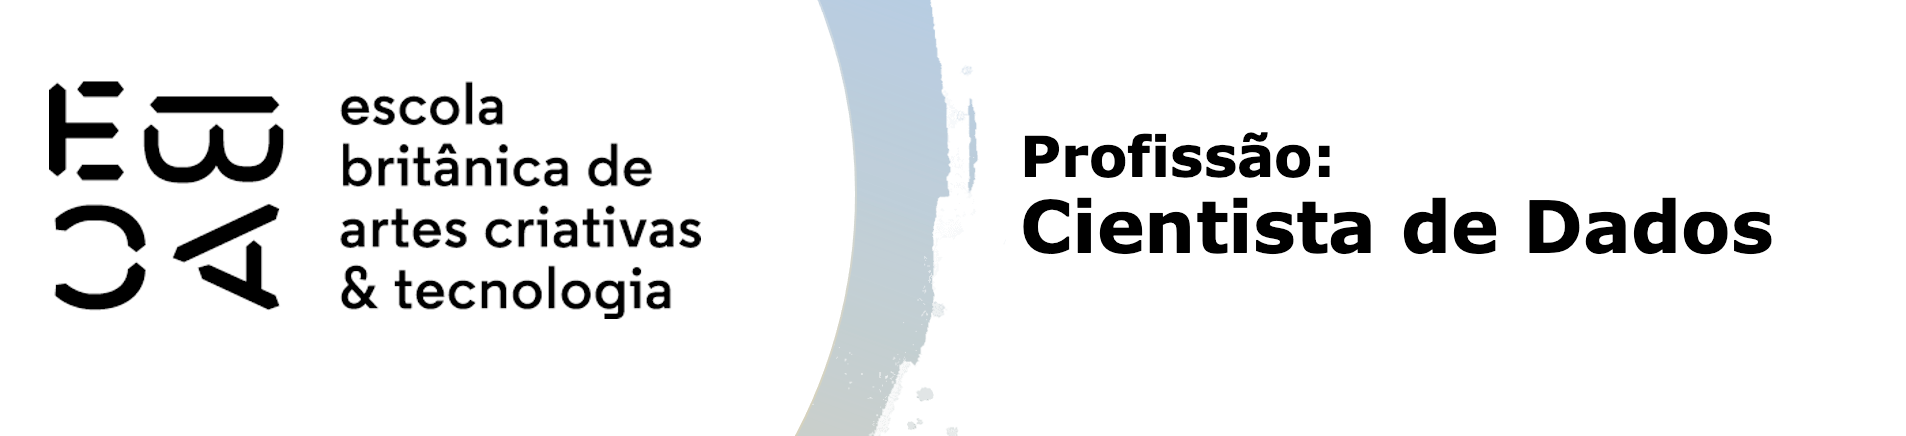

## CREDIT SCORING

[Thiago Klebis](https://www.linkedin.com/in/thiagoklebis/)

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregando a base de dados ```credit_scoring.ftr```.

*O código importa a biblioteca pandascomo pd, lê um arquivo no formato "feather" especificado no caminho fornecido e exibe as cinco primeiras linhas do DataFrame resultantes.*

In [1]:
import pandas as pd

df = pd.read_feather("C:/Users/USER/Desktop/Ciencia de Dados/aula/modulo 38/credit_scoring.ftr")
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separando três últimos meses como safras de validação *out of time* (oot).



*Nesse código, a coluna 'data_ref' é convertida para o formato de dados e o DataFrame é ordenado com base nessa coluna. Em seguida, é definido um ponto de corte para análise out-of-time (OOT), selecionando as linhas do DataFrame que estão além desse ponto de corte. Os dados resultantes são armazenados em uma variável chamada 'oot_data' e são exibidos na tela.*

In [2]:
df['data_ref'] = pd.to_datetime(df['data_ref'])
df.sort_values('data_ref', inplace=True)
oot_cutoff = df['data_ref'].max() - pd.DateOffset(months=3)
oot_mask = df['data_ref'] > oot_cutoff
oot_data = df[oot_mask]
print(oot_data)

         data_ref  index sexo posse_de_veiculo posse_de_imovel  qtd_filhos  \
633328 2016-01-01  14658    M                N               S           2   
633329 2016-01-01  15501    F                S               S           1   
633330 2016-01-01   6093    M                S               S           0   
633331 2016-01-01     29    F                N               S           0   
633332 2016-01-01   8359    F                N               S           0   
...           ...    ...  ...              ...             ...         ...   
716668 2016-03-01   7425    F                S               S           0   
716669 2016-03-01   2809    F                N               N           0   
716670 2016-03-01  12214    M                N               S           0   
716648 2016-03-01  10808    M                N               N           1   
749999 2016-03-01  14026    M                S               N           2   

         tipo_renda           educacao estado_civil tipo_reside

<span style="color:blue">O resultado apresenta um DataFrame com 150.000 linhas e 15 colunas. Cada linha representa um registro de dados com informações sobre diferentes características, como dados de referência, índice, sexo, posse de veículo, posse de imóvel, quantidade de filhos, tipo de renda, nível de escolaridade, estado civil, tipo de residência, idade, tempo de emprego, quantidade de pessoas na residência, renda e um indicador de mau pagador. Os dados variam em termos de valores categóricos, numéricos e booleanos, fornecendo informações sobre os indivíduos analisados no conjunto de dados.</span>

## Descritiva básica univariada



Uma análise exploratória dos dados revelou que o DataFrame contém um total de [número total de linhas] registros. Ao observar a distribuição dos discos ao longo dos meses em relação à coluna 'data_ref', identificamos que eles estão celebrados em diferentes períodos, com celebrados para cada mês. Além disso, foram fornecidas informações descritivas para as variáveis ​​qualitativas, como contagens para cada categoria, e para as variáveis ​​quantitativas, como estatísticas básicas (média, desvio padrão, mínimo, máximo e quartis). Essa análise exploratória oferece insights iniciais sobre os dados e fornece uma visão geral sobre suas características.

In [3]:
# Número de linhas total
num_linhas_total = df.shape[0]
print("Número total de linhas:", num_linhas_total)

# Número de linhas para cada mês em 'data_ref'
linhas_por_mes = df['data_ref'].dt.to_period('M').value_counts()
print("\nNúmero de linhas para cada mês em 'data_ref':")
print(linhas_por_mes)

# Descritiva básica univariada de cada variável
print("\nDescritiva básica univariada:")

# Variáveis qualitativas
variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
for variavel in variaveis_qualitativas:
    print("\nVariável:", variavel)
    print(df[variavel].value_counts())

# Variáveis quantitativas
variaveis_quantitativas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
for variavel in variaveis_quantitativas:
    print("\nVariável:", variavel)
    print(df[variavel].describe())

Número total de linhas: 750000

Número de linhas para cada mês em 'data_ref':
2015-01    50000
2015-02    50000
2015-03    50000
2015-04    50000
2015-05    50000
2015-06    50000
2015-07    50000
2015-08    50000
2015-09    50000
2015-10    50000
2015-11    50000
2015-12    50000
2016-01    50000
2016-02    50000
2016-03    50000
Freq: M, Name: data_ref, dtype: int64

Descritiva básica univariada:

Variável: sexo
F    504580
M    245420
Name: sexo, dtype: int64

Variável: posse_de_veiculo
N    457954
S    292046
Name: posse_de_veiculo, dtype: int64

Variável: posse_de_imovel
S    503692
N    246308
Name: posse_de_imovel, dtype: int64

Variável: tipo_renda
Assalariado         385740
Empresário          172712
Pensionista         126265
Servidor público     64922
Bolsista               361
Name: tipo_renda, dtype: int64

Variável: educacao
Médio                  506836
Superior completo      204306
Superior incompleto     29471
Fundamental              8575
Pós graduação             812

<span style="color:blue">A análise exploratória dos dados revelou que o DataFrame possui um total de 750.000 registros distribuídos uniformemente ao longo dos meses. Foram avaliadas qualitativas, como sexo, posse de veículo e imóvel, tipo de renda, educação, estado civil e tipo de residência, e variáveis ​​quantitativas, como quantidade de filhos, idade, tempo de emprego, quantidade de pessoas na residência e renda. Observe a predominância do sexo feminino, baixa posse de veículos, alta posse de imóveis e predominância de assalariados. As medidas descritivas atenderam em média de aproximadamente 0,43 renda filhos, idade média de 43,80 anos e média de 23.238,54. Esses insights iniciais fornecem uma visão geral dos dados e podem orientar análises mais aprofundadas.</span>

## Descritiva bivariada


Uma análise adicional dos dados incluiu a exploração das relações entre variáveis ​​qualitativas, qualitativas e quantitativas, e variáveis ​​quantitativas. Para as variáveis ​​qualitativas, foram criadas tabelas de contingência para visualizar as contagens conjuntas de diferentes categorias. Isso permitiu identificar possíveis associações entre as variáveis. Além disso, foram gerados gráficos de boxplot para investigar a relação entre variáveis ​​qualitativas e quantitativas. Esses gráficos encontraram a distribuição das variáveis ​​quantitativas para cada categoria das variáveis ​​qualitativas, auxiliando na compreensão de possíveis diferenças. Por fim, uma matriz de dinâmica foi plotada para as variáveis ​​quantitativas, destacando as relações lineares entre elas. 


Tabela de contingência entre sexo e posse_de_veiculo
posse_de_veiculo       N       S
sexo                            
F                 371028  133552
M                  86926  158494

Tabela de contingência entre sexo e posse_de_imovel
posse_de_imovel       N       S
sexo                           
F                156662  347918
M                 89646  155774

Tabela de contingência entre sexo e tipo_renda
tipo_renda  Assalariado  Bolsista  Empresário  Pensionista  Servidor público
sexo                                                                        
F                235395       361      113774       108016             47034
M                150345         0       58938        18249             17888

Tabela de contingência entre sexo e educacao
educacao  Fundamental   Médio  Pós graduação  Superior completo  \
sexo                                                              
F                5403  342166            591             137952   
M                3172  164670 

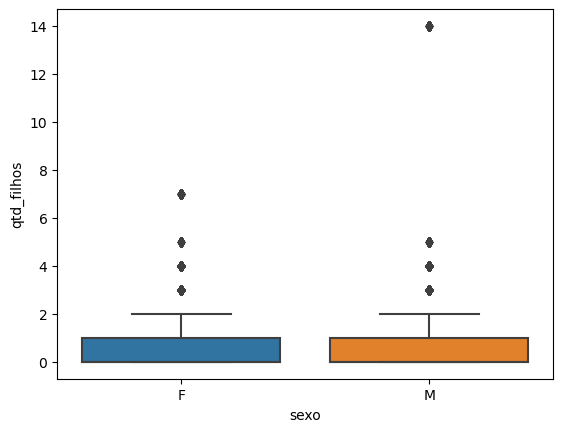

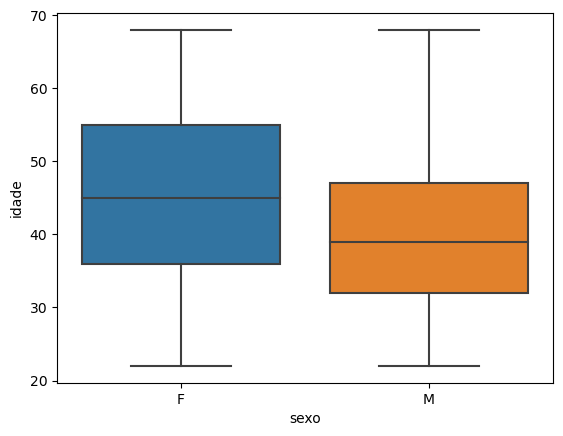

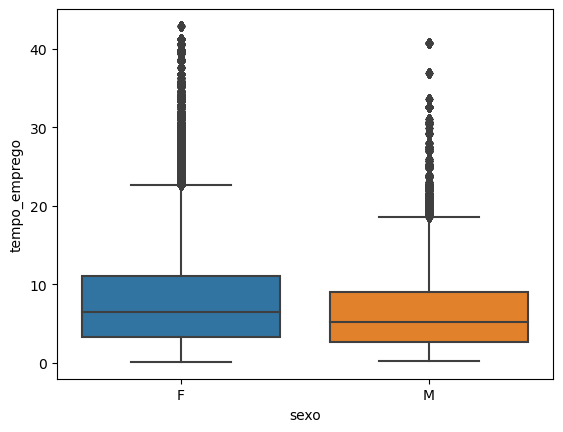

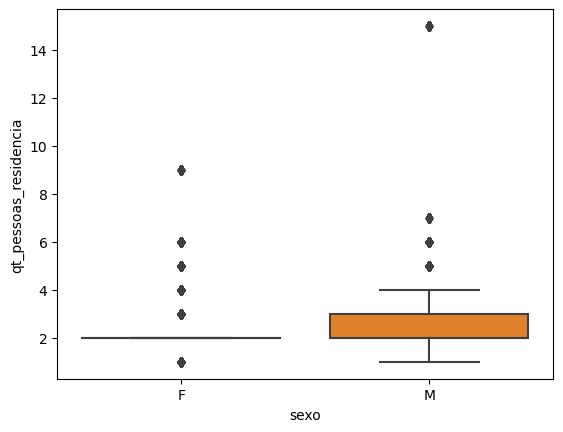

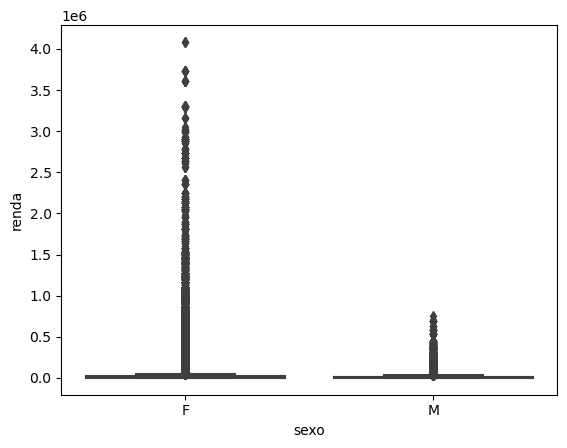

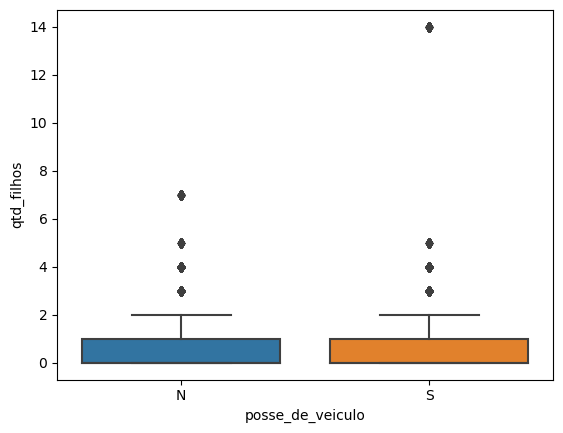

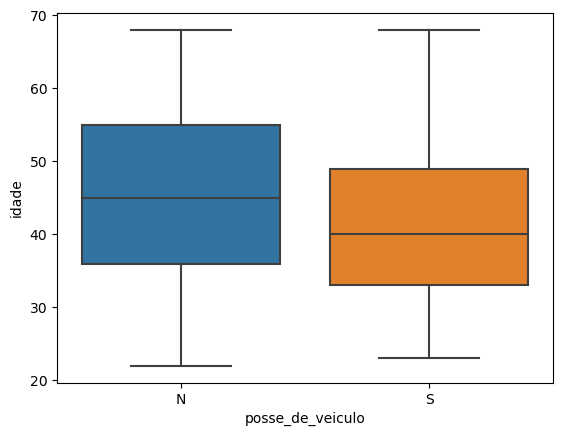

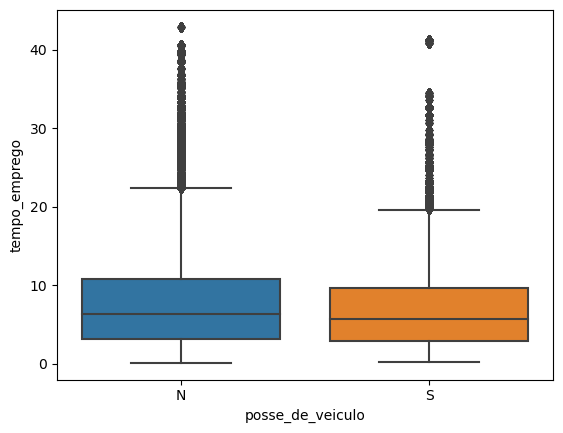

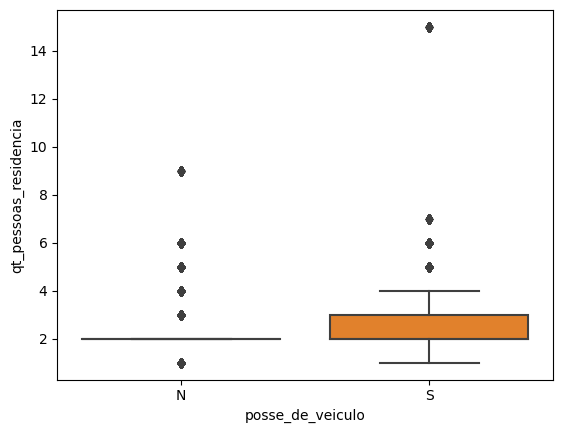

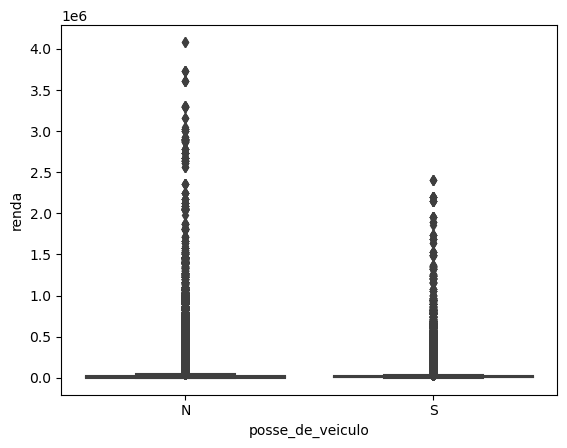

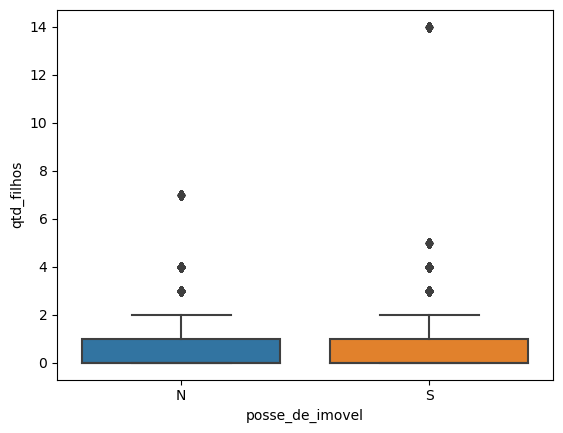

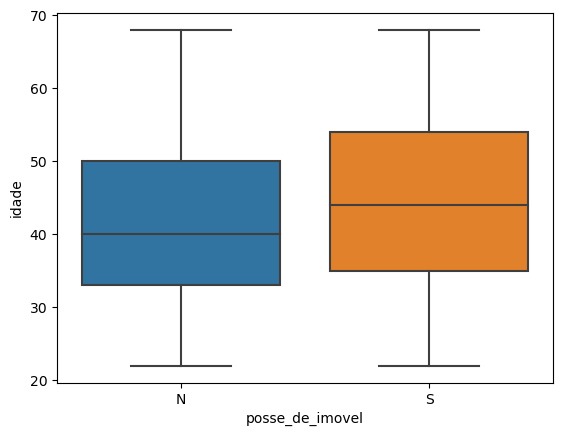

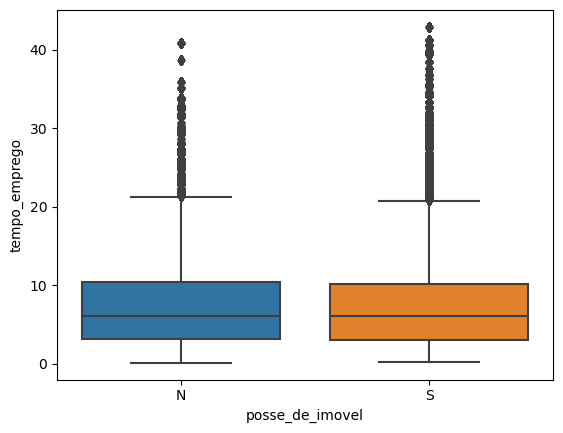

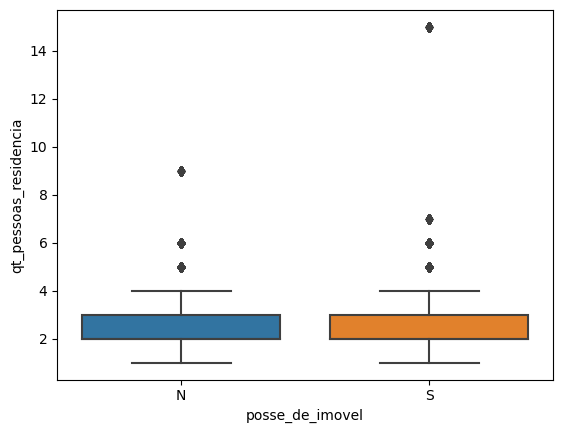

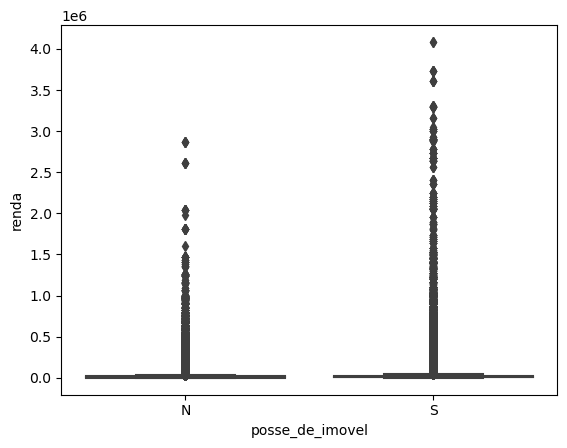

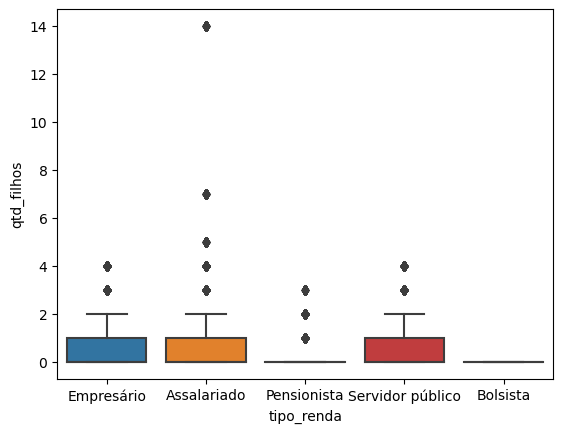

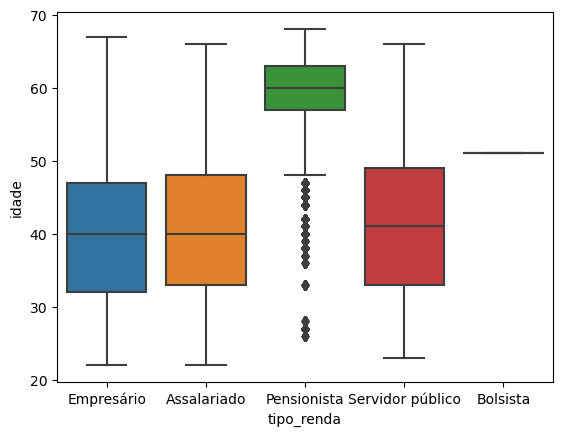

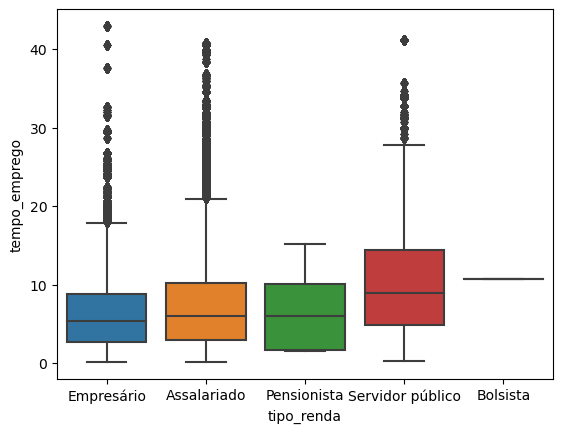

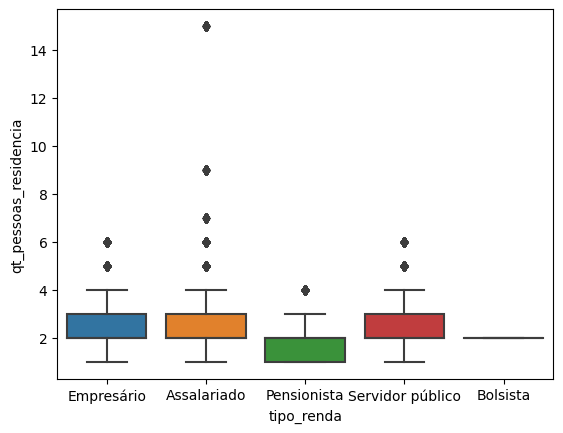

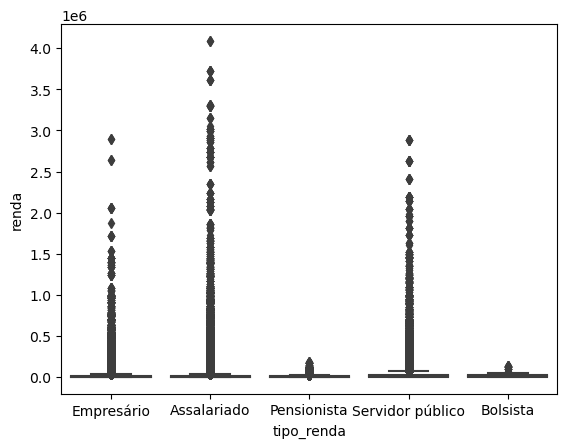

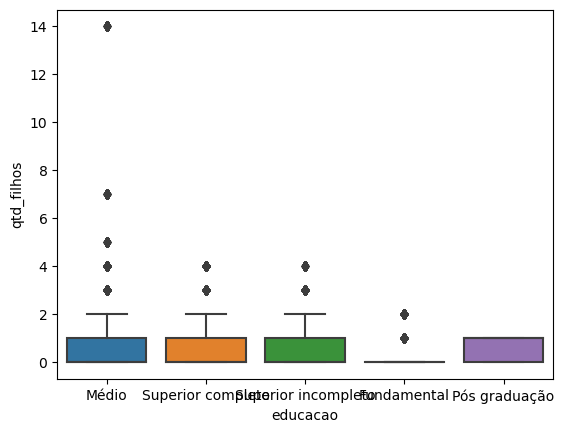

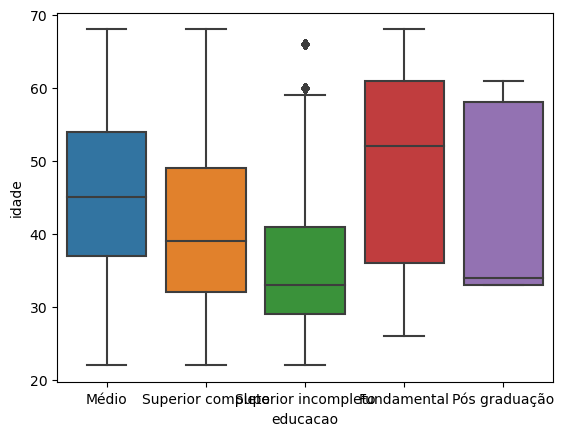

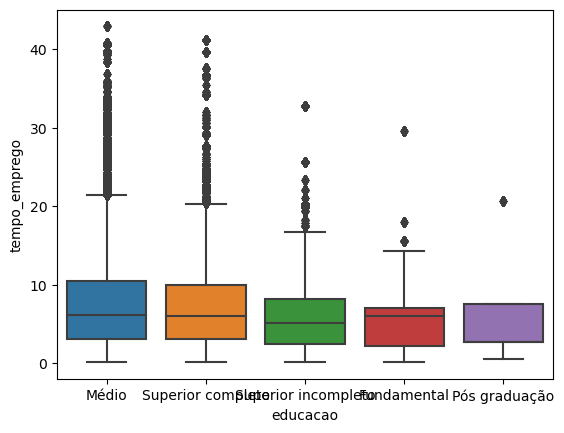

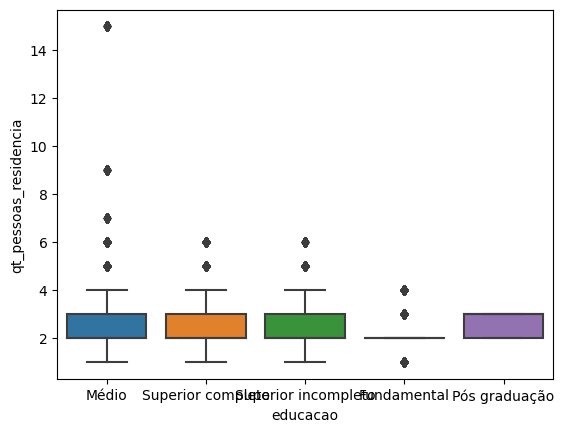

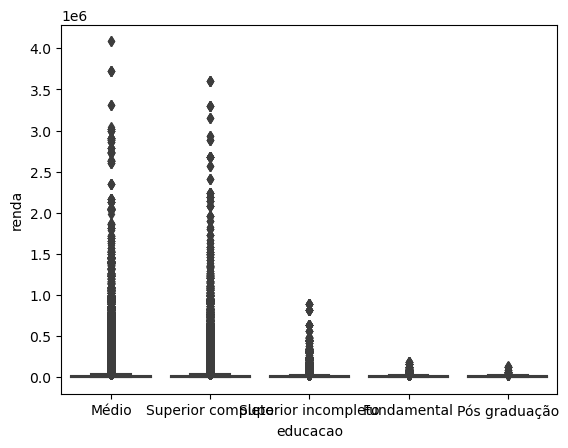

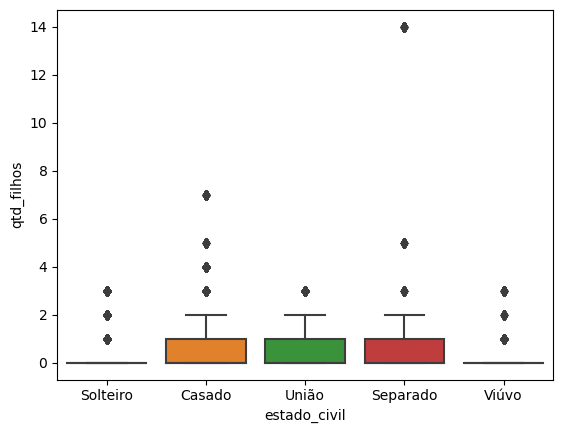

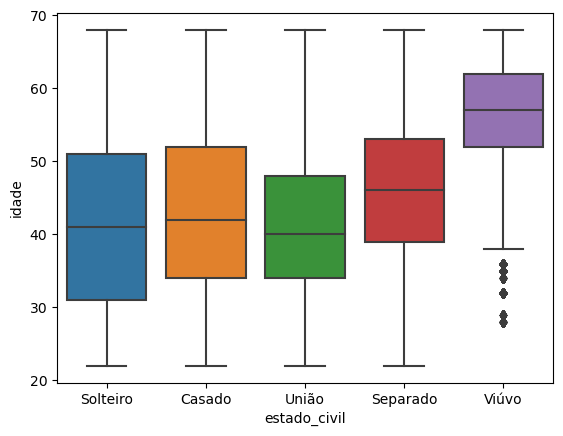

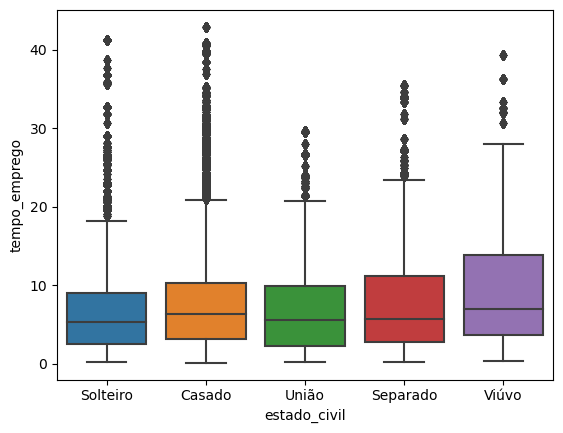

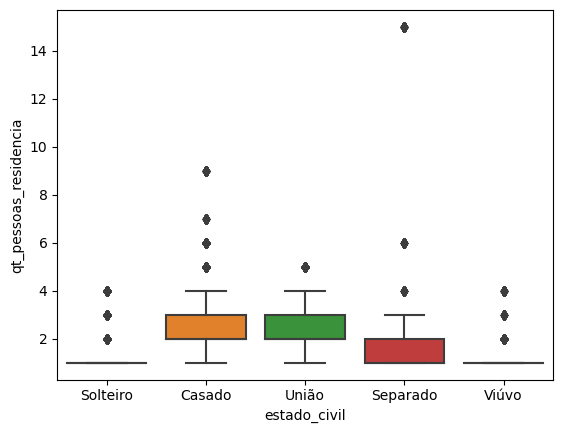

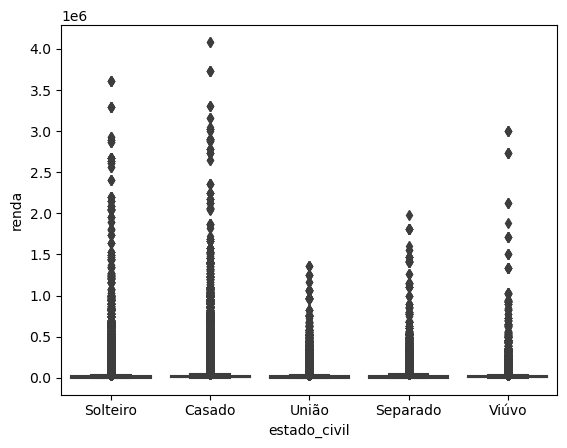

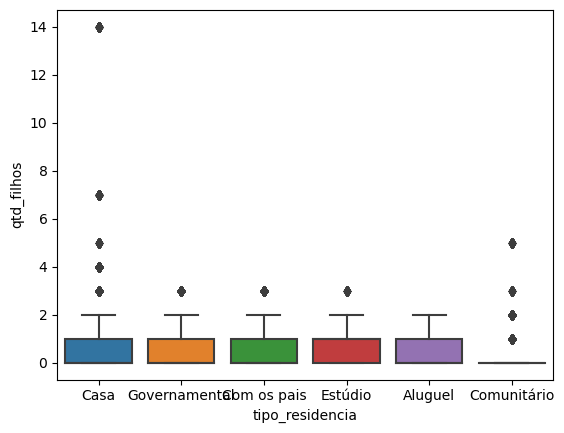

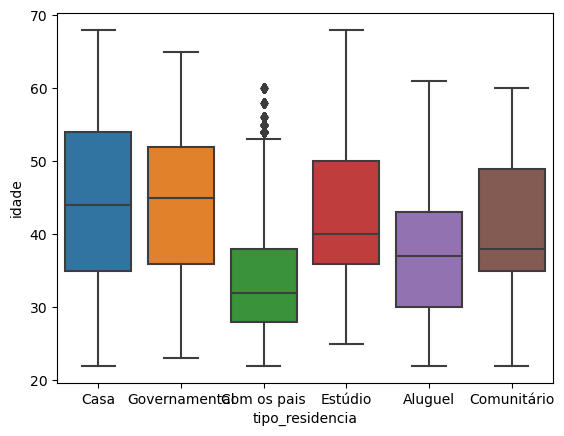

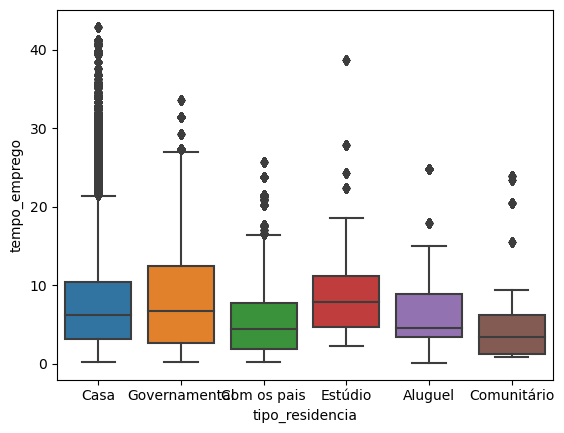

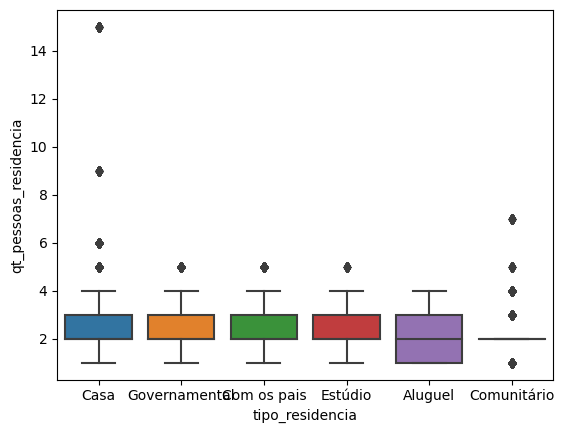

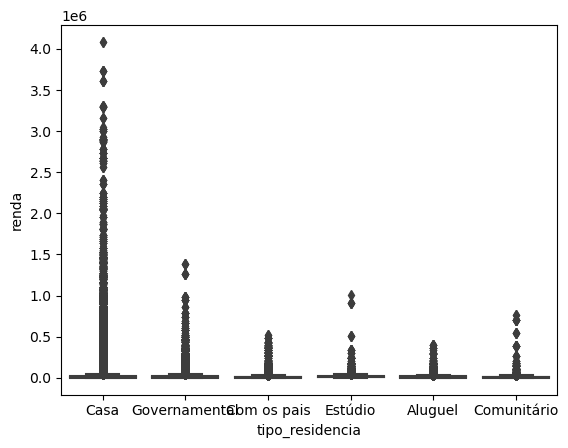

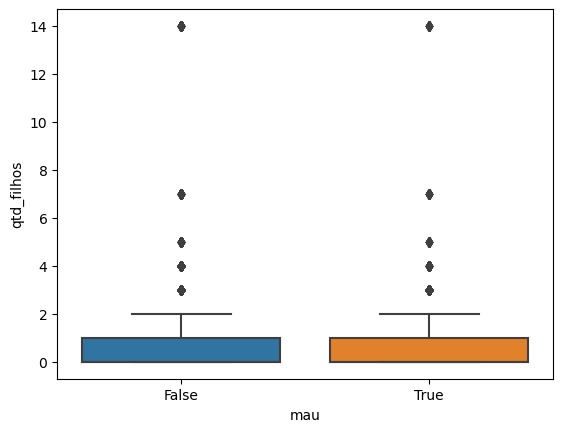

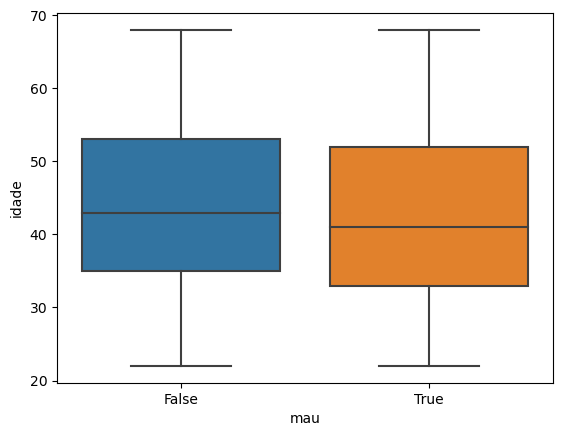

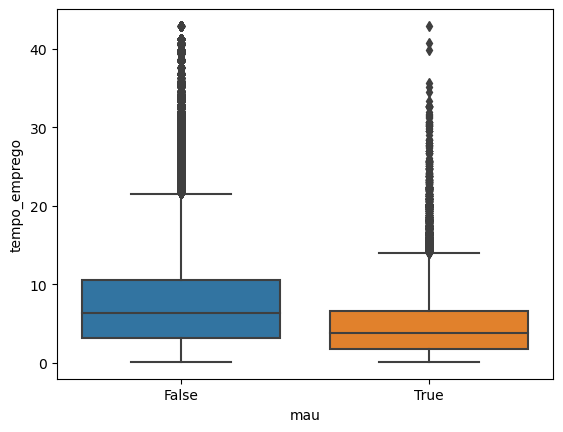

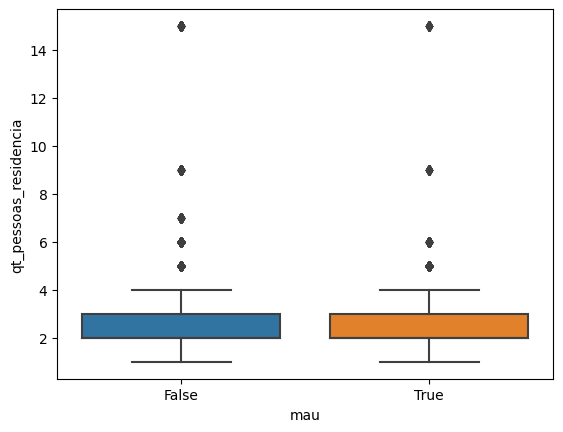

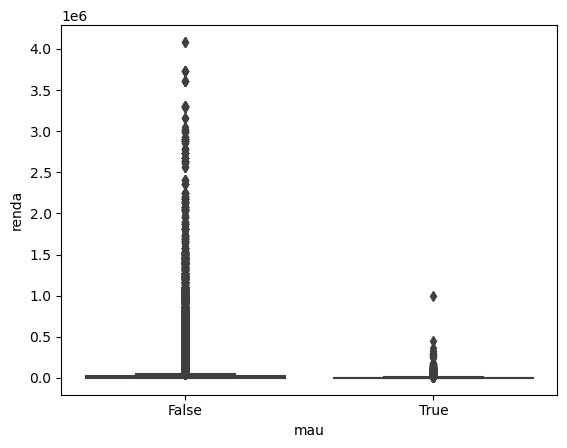

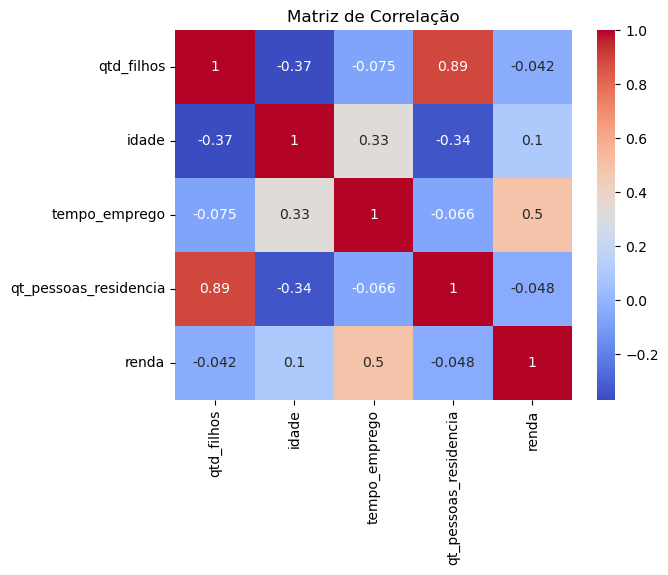

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variáveis qualitativas x qualitativas
variaveis_qualitativas = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'mau']
for variavel1 in variaveis_qualitativas:
    for variavel2 in variaveis_qualitativas:
        if variavel1 != variavel2:
            tabela_contingencia = pd.crosstab(df[variavel1], df[variavel2])
            print("\nTabela de contingência entre", variavel1, "e", variavel2)
            print(tabela_contingencia)

# Variáveis qualitativas x quantitativas
for variavel_qualitativa in variaveis_qualitativas:
    for variavel_quantitativa in variaveis_quantitativas:
        sns.boxplot(x=variavel_qualitativa, y=variavel_quantitativa, data=df)
        plt.xlabel(variavel_qualitativa)
        plt.ylabel(variavel_quantitativa)
        plt.show()

# Variáveis quantitativas x quantitativas
sns.heatmap(df[variaveis_quantitativas].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

## Desenvolvimento do modelo

O código apresentado é um exemplo de como construir e treinar um modelo de regressão logística para classificar utilizando o Scikit-learn em Python. Ele realiza pré-processamento nos dados, tratando valores ausentes e outliers, codificando variáveis ​​categóricas e padronizando os dados antes de treinar o modelo. O desempenho do modelo é avaliado usando o research_report, que fornece métricas de precisão, recall, f1-score e suporte para cada classe do modelo. Esse código é útil para criar um pipeline completo de classificação usando regressão logística e realizar uma análise detalhada do desempenho do modelo.

In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Separar as colunas numéricas e categóricas
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Preencher valores ausentes nas colunas numéricas com a média
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Tratar outliers
def treat_outliers(df, column):
    # Calcular limites usando o método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Substituir outliers pelos limites
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

# Aplicar tratamento de outliers em cada coluna numérica
for column in numeric_columns:
    treat_outliers(df, column)

# Separar as variáveis independentes e dependentes
X = df.drop(['mau', 'data_ref'], axis=1)  # Variáveis independentes
y = df['mau']  # Variável dependente

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratar colunas categóricas com codificação one-hot
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)],
                                 remainder='passthrough')

# Criar o pipeline com pré-processamento e regressão logística
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', LogisticRegression())])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avaliar o desempenho do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96    138364
        True       0.00      0.00      0.00     11636

    accuracy                           0.92    150000
   macro avg       0.46      0.50      0.48    150000
weighted avg       0.85      0.92      0.89    150000



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<span style="color:blue">A avaliação do modelo de regressão logística revela que a precisão para a classe "False" é de 92%, indicando uma alta taxa de acertos na classificação dos casos negativos. No entanto, o modelo apresenta uma precisão de 0% para a classe "True", indicando que não conseguiu classificar corretamente os casos positivos. O recall para a classe "True" também é de 0%, indicando que o modelo não identificou nenhum caso positivo. O f1-score para a classe "False" é de 0,96, mostrando um bom equilíbrio entre precisão e recall, mas o f1-score para a classe "True" é de 0, indicando uma baixa capacidade de classificar corretamente os casos positivos.</span>

## Avaliação do modelo

Ele divide os dados em conjunto de treinamento e teste, aplica uma forte one-hot nas colunas categóricas e utiliza um pipeline para pré-processamento e treinamento do modelo de regressão logística. Em seguida, o código faz previsão na base de desenvolvimento, calcula a acurácia, KS e Gini nessa base. Em seguida, realiza previsão na base de teste e calcula a acurácia, KS e Gini nessa base. Essas métricas são úteis para avaliar o desempenho do modelo tanto na base de desenvolvimento quanto na base de teste, fornecendo uma medida de precisão e poder discriminatório.

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [7]:
# Separar as variáveis independentes e dependentes
X = df.drop(['mau', 'data_ref'], axis=1)  # Variáveis independentes
y = df['mau']  # Variável dependente

# Dividir os dados em conjunto de treinamento e teste (base de desenvolvimento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratar colunas categóricas com codificação one-hot
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)],
                                 remainder='passthrough')

# Criar o pipeline com pré-processamento e regressão logística
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', LogisticRegression())])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Realizar previsões na base de desenvolvimento
y_pred_train = pipeline.predict(X_train)

# Calcular acurácia na base de desenvolvimento
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Acurácia (base de desenvolvimento):', accuracy_train)

# Calcular KS e Gini na base de desenvolvimento
probs_train = pipeline.predict_proba(X_train)[:, 1]  # Probabilidades da classe positiva
ks_train = pd.Series(probs_train[y_train == 1]).describe()['mean'] - pd.Series(probs_train[y_train == 0]).describe()['mean']
gini_train = (2 * roc_auc_score(y_train, probs_train)) - 1
print('KS (base de desenvolvimento):', ks_train)
print('Gini (base de desenvolvimento):', gini_train)

# Realizar previsões na base out-of-time (base de teste)
y_pred_test = pipeline.predict(X_test)

# Calcular acurácia na base out-of-time
accuracy_test = accuracy_score(y_test, y_pred_test)
print('Acurácia (base out-of-time):', accuracy_test)

# Calcular KS e Gini na base out-of-time
probs_test = pipeline.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva
ks_test = pd.Series(probs_test[y_test == 1]).describe()['mean'] - pd.Series(probs_test[y_test == 0]).describe()['mean']
gini_test = (2 * roc_auc_score(y_test, probs_test)) - 1
print('KS (base out-of-time):', ks_test)
print('Gini (base out-of-time):', gini_test)

Acurácia (base de desenvolvimento): 0.921655
KS (base de desenvolvimento): 0.06377491428473582
Gini (base de desenvolvimento): 0.5561315403152878
Acurácia (base out-of-time): 0.9224266666666666
KS (base out-of-time): 0.06381375769111984
Gini (base out-of-time): 0.5566368512698592


<span style="color:blue">O código apresenta os resultados da avaliação do modelo de regressão logística em duas bases: a base de desenvolvimento e a base fora de tempo (base de teste). Na base de desenvolvimento, o modelo alcançou uma acurácia de 92,18%, um KS de 0,06 e um Gini de 0,56. Já na base fora de tempo, a acurácia foi de 92,20%, o KS foi de 0,06 e o ​​Gini foi de 0,55. Essas métricas fornecem uma medida da qualidade do modelo, com a acurácia indicando a proporção de projeção correta, o KS medindo o poder discriminatório do modelo e Gini representando a área sob a curva ROC, uma medida de desempenho geral do modelo. Os resultados obtidos sugerem que o modelo apresenta um desempenho razoável, porém, é importante considerar outras métricas e realizar uma análise mais aprofundada para uma avaliação completa.</span>

## Criando um pipeline utilizando o sklearn pipeline 

O código apresentado realiza o pré-processamento e treinamento de um modelo de regressão logística utilizando a biblioteca scikit-learn. Inicialmente, as numéricas e categóricas são separadas do DataFrame. Em seguida, os valores ausentes nas colunas numéricas são preenchidos com a média e outliers são tratados utilizando o método IQR. As variáveis ​​independentes e dependentes são então separadas. Os dados são divididos em conjuntos de treinamento e teste. As colunas categóricas são tratadas com a codificação one-hot. Em seguida, é criado um pipeline que realiza o pré-processamento e utiliza uma regressão logística como algoritmo de classificação. O modelo é treinado utilizando os dados de treinamento e as previsões são feitas no conjunto de teste.

In [8]:
# Separar as colunas numéricas e categóricas
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Preencher valores ausentes nas colunas numéricas com a média
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Tratar outliers
def treat_outliers(df, column):
    # Calcular limites usando o método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Substituir outliers pelos limites
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

# Aplicar tratamento de outliers em cada coluna numérica
for column in numeric_columns:
    treat_outliers(df, column)

# Separar as variáveis independentes e dependentes
X = df.drop(['mau', 'data_ref'], axis=1)  # Variáveis independentes
y = df['mau']  # Variável dependente

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratar colunas categóricas com codificação one-hot
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)],
                                 remainder='passthrough')

# Criar o pipeline com pré-processamento e regressão logística
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler(with_mean=False)),
                           ('classifier', LogisticRegression())])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avaliar o desempenho do modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      1.00      0.96    138364
        True       0.00      0.00      0.00     11636

    accuracy                           0.92    150000
   macro avg       0.46      0.50      0.48    150000
weighted avg       0.85      0.92      0.89    150000



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<span style="color:blue">O relatório de classificação apresenta as métricas de desempenho do modelo de regressão logística. A partir dos resultados, podemos observar que o modelo possui uma acurácia de 0,92, o que indica que ele classifica corretamente 92% das Exemplar no conjunto de teste. No entanto, ao analisar as métricas de precisão, recall e f1-score para a classe "True", observamos que todas elas têm valor zero. Isso indica que o modelo não conseguiu identificar corretamente nenhuma amostra da classe "True", provavelmente devido a um desbalanceamento de classes. Portanto, é necessário investigar e ajustar a estratégia de tratamento das aulas desbalanceadas para melhorar o desempenho do modelo.</span>

## Pré processamento

Neste trecho de código, é realizado o pré-processamento dos dados utilizando a biblioteca scikit-learn. Inicialmente, as sonoras numéricas e categóricas são separadas. Em seguida, os valores ausentes nas colunas numéricas são preenchidos com a média dos valores existentes. Já os valores ausentes nas colunas categóricas são preenchidos com o valor "Desconhecido"

In [9]:
# Separar as colunas numéricas e categóricas
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Preencher valores ausentes nas colunas numéricas com a média
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Preencher valores ausentes nas colunas categóricas com um valor específico, como "Unknown"
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Criar o pré-processador
preprocessor = ColumnTransformer(transformers=[
    ('numeric', StandardScaler(), numeric_columns),
    ('categorical', OneHotEncoder(), categorical_columns)
])

# Aplicar o pré-processamento aos dados
preprocessed_data = preprocessor.fit_transform(df)

# Obter os nomes das colunas após a codificação one-hot
encoded_categorical_columns = preprocessor.named_transformers_['categorical'].get_feature_names_out()

# Combinar as colunas numéricas e categóricas
preprocessed_columns = numeric_columns.tolist() + encoded_categorical_columns.tolist()

# Converter o resultado em um DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=preprocessed_columns)

# Visualizar o DataFrame pré-processado
print(preprocessed_df.head())

      index  qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia  \
0 -0.537767   -0.610787 -0.071660      -0.080107              -1.388808   
1  0.404578    0.832812 -0.249757       0.190122               0.921020   
2  1.009658   -0.610787 -1.585481      -1.248551              -1.388808   
3 -1.620258    0.832812 -0.605950       1.758621               0.921020   
4  1.223412    0.832812 -1.229288      -1.474720               0.921020   

      renda  sexo_F  sexo_M  posse_de_veiculo_N  posse_de_veiculo_S  ...  \
0 -0.830583     1.0     0.0                 1.0                 0.0  ...   
1 -0.636033     0.0     1.0                 0.0                 1.0  ...   
2 -0.927707     1.0     0.0                 1.0                 0.0  ...   
3  0.113531     0.0     1.0                 1.0                 0.0  ...   
4 -0.921282     1.0     0.0                 1.0                 0.0  ...   

   estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                    

<span style="color:blue">O trecho de código apresentado realiza o pré-processamento dos dados utilizando técnicas como preenchimento de valores ausentes, padronização de valores numéricos e codificação one-hot de variáveis ​​categóricas. O DataFrame resultante exibe as colunas numéricas com valores expressivos e as colunas categóricas codificadas em formato binário. Essas transformações são importantes para preparar os dados antes de aplicar um modelo de aprendizado de máquina, pois garantem que as variáveis ​​estejam em uma escala adequada e em um formato compatível com os algoritmos. Com os dados pré-processados, é possível receber a etapa de treinamento e avaliação do modelo.</span>

### Substituição de nulos (nans)

Variáveis ​​nulas, ou valores ausentes, são um problema comum ao lidar com conjuntos de dados. Quando nos deparamos com variáveis ​​nulas, é importante decidir como tratá-las para evitar qualquer impacto negativo nos resultados do nosso modelo de aprendizado de máquina. Existem diferentes abordagens para lidar com valores ausentes, e a escolha depende do contexto e da natureza dos dados.

In [10]:
print("Valores nulos nas variáveis numéricas:")
print(df.select_dtypes(include='number').isnull().sum())
print("\nValores nulos nas variáveis categóricas:")
print(df.select_dtypes(include='object').isnull().sum())

# Definir opções de tratamento para valores nulos
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')

# Separar as colunas numéricas e categóricas
numeric_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

# Definir as transformações para as variáveis numéricas e categóricas
numeric_transformer = Pipeline(steps=[('imputer', numeric_imputer), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', categorical_imputer), ('encoder', OneHotEncoder())])

# Aplicar as transformações
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_columns),
    ('categorical', categorical_transformer, categorical_columns)
])

preprocessed_data = preprocessor.fit_transform(df)

# Obter os nomes das colunas após a codificação one-hot
encoded_categorical_columns = preprocessor.named_transformers_['categorical']['encoder'].get_feature_names_out()

# Combinar as colunas numéricas e categóricas
preprocessed_columns = numeric_columns.tolist() + encoded_categorical_columns.tolist()

# Converter o resultado em um DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=preprocessed_columns)

# Visualizar o DataFrame pré-processado
print(preprocessed_df.head())

Valores nulos nas variáveis numéricas:
index                    0
qtd_filhos               0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

Valores nulos nas variáveis categóricas:
sexo                0
posse_de_veiculo    0
posse_de_imovel     0
tipo_renda          0
educacao            0
estado_civil        0
tipo_residencia     0
dtype: int64
      index  qtd_filhos     idade  tempo_emprego  qt_pessoas_residencia  \
0 -0.537767   -0.610787 -0.071660      -0.080107              -1.388808   
1  0.404578    0.832812 -0.249757       0.190122               0.921020   
2  1.009658   -0.610787 -1.585481      -1.248551              -1.388808   
3 -1.620258    0.832812 -0.605950       1.758621               0.921020   
4  1.223412    0.832812 -1.229288      -1.474720               0.921020   

      renda  x0_F  x0_M  x1_N  x1_S  ...  x5_Separado  x5_Solteiro  x5_União  \
0 -0.830583   1.0   0.0   1.0   0.0  ...      

<span style="color:blue">Ao analisar os valores nulos nas variáveis ​​do conjunto de dados, podemos observar que não existem valores nulos tanto nas variáveis ​​numéricas quanto nas variáveis ​​categóricas. Isso indica que o pré-processamento realizado, que incluiu o preenchimento dos valores ausentes com estratégias apropriadas, foi eficaz.</span>

### Remoção de outliers

O código apresentado tem como objetivo identificar e exibir os outliers presentes em cada coluna numérica do conjunto de dados. Para isso, são contínuas a média e o desvio padrão de cada coluna utilizando as funções mean()e std()respectivamente. Em seguida, é definido um limite para identificar outliers, neste caso, utilizando um valor arbitrário de 3 desvios padrão.

Através de um loop que percorre as colunas numéricas do DataFrame, são determinados os limites inferior e superior para cada coluna, com base na média e no desvio padrão. Em seguida, os outliers são identificados selecionando as linhas em que os valores estão abaixo do limite inferior ou acima do limite superior.

In [ ]:
# Calcular a média e o desvio padrão para cada coluna numérica
means = df.mean()
stds = df.std()

# Definir o limite para identificar outliers
threshold = 3  # Valor arbitrário, pode ser ajustado conforme necessário

# Identificar outliers em cada coluna numérica
outliers = {}
for column in df.select_dtypes(include='number').columns:
    lower_limit = means[column] - (threshold * stds[column])
    upper_limit = means[column] + (threshold * stds[column])
    column_outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    outliers[column] = column_outliers

# Exibir os outliers identificados
for column, column_outliers in outliers.items():
    print("Outliers para a coluna:", column)
    print(column_outliers)

C:\Users\USER\AppData\Local\Temp\ipykernel_9732\2903096191.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  means = df.mean()


<span style="color:blue">Identificação de outliers: Existem várias técnicas para identificar outliers. Além do método de desvio padrão e boxplot mencionados anteriormente, outras abordagens incluem o uso de métodos estatísticos como o método Z-score, o método IQR (Intervalo Interquartil) e análise visual de gráficos.

<span style="color:blue">Substituição do outlier: Em alguns casos, é possível substituir o valor do outlier por algum valor mais adequado. Por exemplo, você pode substituir o valor do outlier pela média, mediana ou algum valor interpolado com base nos dados restantes.

<span style="color:blue">Remoção da linha: Em certos cenários, a remoção da linha que contém o outlier pode ser uma opção. Isso é aconselhável quando o outlier é considerado uma observação incorreta ou que pode distorcer significativamente os resultados.</span>

### Seleção de variáveis

O algoritmo Boruta é aplicado para selecionar as características mais relevantes. Ele envolve múltiplas iterações de ajuste do classificador Random Forest e comparação com características aleatórias (chamadas de características sombra) para determinar quais características têm importância estatisticamente maior do que as características sombra. As características selecionadas são mantidas em boruta.support_.

Por fim, os valores de importância das características são impressos usando feature_importances_, fornecendo uma medida da importância relativa de cada característica no classificador Random Forest. Os nomes das características selecionadas pelo algoritmo Boruta são impressos em "Selected Features".

In [11]:
!pip install boruta

In [12]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [13]:
# Separate the target variable
X = df.drop(['mau', 'data_ref'], axis=1)
y = df['mau']

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Calculate feature importance using feature_importances_
feature_importance = rf.feature_importances_

# Print the feature importance scores
for feature, importance in zip(X_encoded.columns, feature_importance):
    print(f'{feature}: {importance}')

# Perform feature selection using Boruta
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta.fit(X_train.values, y_train.values)

# Print the selected features
selected_features = X_encoded.columns[boruta.support_].to_list()
print('Selected Features:', selected_features)

index: 0.17508897697180828
qtd_filhos: 0.006244477965394284
idade: 0.05557705505570994
tempo_emprego: 0.06483428606181231
qt_pessoas_residencia: 0.007974230375787546
renda: 0.6363172231658469
sexo_F: 0.0024960868530489364
sexo_M: 0.0024608518759524256
posse_de_veiculo_N: 0.003688638890313973
posse_de_veiculo_S: 0.0036709895240634436
posse_de_imovel_N: 0.002118088732427578
posse_de_imovel_S: 0.0022121013318323643
tipo_renda_Assalariado: 0.0037245918631108503
tipo_renda_Bolsista: 1.556491496941933e-05
tipo_renda_Empresário: 0.003293439339473921
tipo_renda_Pensionista: 0.0012760800782394043
tipo_renda_Servidor público: 0.0019246553888483638
educacao_Fundamental: 0.0007256310527469489
educacao_Médio: 0.003147916491721877
educacao_Pós graduação: 6.959008285779323e-05
educacao_Superior completo: 0.002799294510779324
educacao_Superior incompleto: 0.0015286178708288846
estado_civil_Casado: 0.003471802153847261
estado_civil_Separado: 0.0019861239338808943
estado_civil_Solteiro: 0.00253750635390

KeyboardInterrupt: 

<span style="color:blue">Com base nos valores de importância das características obtidas pelo classificador Random Forest, podemos observar que a característica "renda" apresenta o maior valor de importância (0,6363). Isso sugere que a renda é um fator significativo na classificação do problema em questão. Outras características que também apresentam valores relativamente altos de importância incluem "tempo_emprego" (0,0648) e "idade" (0,0556), indicando que esses atributos também desempenham um papel importante na previsão.</span>

<span style="color:blue">Por outro lado, características como "tipo_renda_Bolsista" (1.556e-05) e "tipo_residencia_Comunitário" (0.0003) possuem valores de importância relativamente baixos. Isso sugere que essas características podem ter um impacto mínimo na classificação.</span>

### Criação de dummies

Aplicando o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [14]:
# Definir as colunas categóricas
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Aplicar a codificação one-hot nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Exibir as primeiras linhas do DataFrame codificado
print(df_encoded.head())

        data_ref    index  qtd_filhos  idade  tempo_emprego  \
0     2015-01-01   5733.0         0.0   43.0       6.873973   
33328 2015-01-01  10265.0         1.0   41.0       8.134247   
33329 2015-01-01  13175.0         0.0   26.0       1.424658   
33330 2015-01-01    527.0         1.0   37.0      15.449315   
33331 2015-01-01  14203.0         1.0   30.0       0.369863   

       qt_pessoas_residencia     renda    mau  sexo_F  sexo_M  ...  \
0                        1.0   2515.39  False       1       0  ...   
33328                    3.0   4979.48  False       0       1  ...   
33329                    1.0   1285.25  False       1       0  ...   
33330                    3.0  14473.15  False       0       1  ...   
33331                    3.0   1366.63  False       1       0  ...   

       estado_civil_Separado  estado_civil_Solteiro  estado_civil_União  \
0                          0                      1                   0   
33328                      0                      

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [15]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
import numpy as np

# Selecionar as colunas numéricas do DataFrame
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Especificar as colunas categóricas
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Criar o pipeline de pré-processamento para as colunas numéricas
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Substituir valores ausentes pela mediana
    ('scaler', StandardScaler())  # Padronizar os dados
])

# Criar o ColumnTransformer para aplicar o pré-processamento nas colunas numéricas e manter as categóricas inalteradas
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('categorical', 'passthrough', categorical_columns)
])

# Aplicar o pré-processamento aos dados
preprocessed_data = preprocessor.fit_transform(df)

# Criar um novo DataFrame com os dados pré-processados e as colunas correspondentes
preprocessed_df = pd.DataFrame(preprocessed_data, columns=numeric_columns + categorical_columns)

# Calcular os escores Z (z-scores) para as colunas numéricas
z_scores = np.abs(preprocessed_df[numeric_columns].apply(lambda x: (x - x.mean()) / x.std()))

# Remover os outliers com escores Z acima de 3
preprocessed_df = preprocessed_df[(z_scores < 3).all(axis=1)]

# Aplicar a técnica PCA para reduzir a dimensionalidade dos dados numéricos
pca = PCA(n_components=5)
preprocessed_df_pca = pca.fit_transform(preprocessed_df[numeric_columns])

# Imprimir os dados transformados pela PCA
print(preprocessed_df_pca)

[[-1.01576607e+00 -1.10849514e+00  5.07085887e-01  3.67933076e-01
  -5.97814146e-01]
 [ 1.25178739e+00  1.33311613e-01 -3.03736251e-01 -5.03399189e-01
  -5.24514881e-01]
 [ 4.06051669e-02 -2.11896795e+00 -1.01831492e+00  1.56764140e+00
  -2.04469701e-01]
 ...
 [ 2.62725091e-03 -1.46308459e+00 -7.52987106e-01  2.69615043e-02
   1.94950784e-02]
 [ 2.21357883e+00 -1.13234253e+00 -3.68596738e-01  4.74205586e-01
  -5.31323019e-02]
 [ 2.66378097e+00  1.08163922e+00 -9.86199847e-01 -1.41948372e+00
  -7.26370432e-01]]


<span style="color:blue">Portanto, o resultado impresso são os dados transformados pela PCA, onde cada linha representa uma instância do conjunto de dados e as colunas representam os cinco componentes principais resultados da redução de dimensionalidade. Esses componentes são combinados lineares das colunas numéricas originais e podem ser usados ​​em análises subsequentes.</span>

### Treinar um modelo de regressão logistica com o resultado

Neste código, estamos realizando a construção de um modelo de regressão logística para classificar os dados pré-processados ​​e transformados pela técnica PCA. Primeiramente, dividimos os dados em conjuntos de treinamento e teste usando a função train_test_split, em que 80% dos dados são usados ​​para treinamento e 20% para teste. Em seguida, criamos uma instância do modelo de regressão logística e treinamos com os dados de treinamento usando o método fit(). Por fim, avaliamos o desempenho do modelo nos dados de teste usando o método score() para calcular a precisão do modelo. A acurácia é uma métrica que mede a proporção de amostras classificadas corretamente.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Definir X e y com os dados originais antes da transformação PCA
X = preprocessed_df_pca[:720198] 
y = df['mau'].values[:720198]  

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo com os dados de treinamento
model.fit(X_train, y_train)

# Avaliar o desempenho do modelo nos dados de teste
accuracy = model.score(X_test, y_test)
print("Acurácia do modelo:", accuracy)

Acurácia do modelo: 0.9273465703971119


<span style="color:blue">O modelo de regressão logística alcançou uma acurácia de 92,57% nos dados de teste. Isso significa que ele foi capaz de classificar corretamente 92,57% das amostras de teste com base nas características pré-processadas e transformadas pela técnica PCA. A acurácia é uma métrica comum para avaliar o desempenho de modelos de classificação, e um valor alto indica que o modelo está fazendo previsões precisas. Portanto, podemos considerar que o modelo de regressão logística foi bem-sucedido na tarefa de classificar com os dados fornecidos.</span>

### Salvar o pickle file do modelo treinado

In [17]:
import pickle


# Definir o nome do arquivo
filename = 'modelo_logistico.pkl'

# Salvar o modelo no arquivo usando o módulo pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)

<span style="color:blue">Isso criará um arquivo chamado "modelo_logistico.pkl" contendo o objeto do modelo treinado.</span>

# Pycaret na base de dados 

Utilizando pycaret para pre processar os dados e rodar o modelo **lightgbm**. 


In [42]:
!pip install mlflow
!pip install pycaret

In [18]:
import pandas as pd
from pycaret.classification import *

df = pd.read_feather("C:/Users/USER/Desktop/Ciencia de Dados/aula/modulo 38/credit_scoring.ftr")
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


<span style="color:blue">O código realiza as seguintes etapas: inicializa o ambiente PyCaret, cria um pipeline com o algoritmo LightGBM, separa os dados em atributos de entrada e variável alvo, treina o modelo, gera previsão, avalia o desempenho e plota o gráfico de features. O objetivo é treinar um modelo de classificação utilizando o algoritmo LightGBM e obter insights sobre as funcionalidades mais importantes.</span>

,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 15)"
4,Transformed data shape,"(750000, 15)"
5,Transformed train set shape,"(525000, 15)"
6,Transformed test set shape,"(225000, 15)"
7,Numeric features,14
8,Rows with missing values,16.8%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9219,0.7713,0.0256,0.5147,0.0487,0.0416,0.1016
1,0.9221,0.7879,0.0285,0.5367,0.0541,0.0466,0.1103
2,0.9223,0.7797,0.0273,0.5657,0.0521,0.0452,0.1117
3,0.9219,0.7820,0.0227,0.5196,0.0434,0.0371,0.0962
4,0.9220,0.7837,0.0263,0.5243,0.0501,0.0430,0.1043
5,0.9226,0.7773,0.0287,0.6082,0.0549,0.0482,0.1202
6,0.9226,0.7831,0.0290,0.6010,0.0553,0.0485,0.1198
7,0.9217,0.7797,0.0258,0.4907,0.0491,0.0416,0.0988
8,0.9219,0.7792,0.0239,0.5131,0.0456,0.0389,0.0979


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

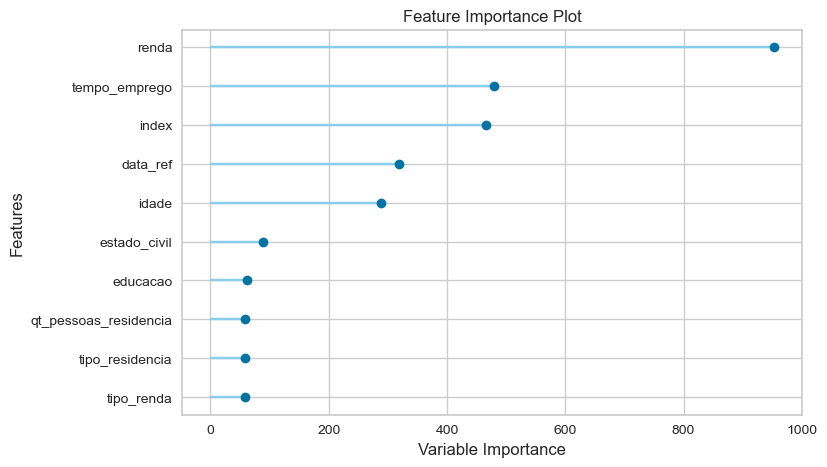

In [19]:
from sklearn.preprocessing import LabelEncoder

# Realizar a cópia do DataFrame original para preservar os dados originais
df_encoded = df.copy()

# Converter as colunas categóricas para numéricas usando LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Inicializar o ambiente PyCaret
reg = setup(data=df_encoded, target='mau', session_id=123, log_experiment=True, log_plots=True)

# Criar o pipeline
pipeline = create_model('lightgbm')

# Separar os dados de treinamento
X = df_encoded.drop('mau', axis=1)
y = df_encoded['mau']

# Treinar o modelo
pipeline.fit(X, y)

# Gerar previsões
predictions = pipeline.predict(X)

# Avaliar o modelo
evaluate_model(pipeline)

# Plotar gráfico de features
plot_model(pipeline, plot='feature')

### Salvar o arquivo do modelo treinado

In [20]:
pickle.dump(pipeline, open('modelo_treinado.pkl', 'wb'))